### Exploratory Data Analysis for online sales 

##### data fetching

In [3]:
import pandas as pd
retail_df = pd.read_excel(io='online_retail_II.xlsx')

In [4]:
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Customer ID conversion to int type
# for the anonymous customer, NaN -> -1

retail_sp = retail_df.copy()
retail_sp['Customer ID'] = retail_sp['Customer ID'].fillna(-1).astype(int)
retail_sp.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


##### Purchase trend analysis in timely manner

- purchase trend visualization per nation

In [6]:
retail_ts = retail_sp[['InvoiceDate', 'Quantity', 'Price', 'Country']]
# create new column: sales_amount
retail_ts.loc[:, 'sales_amount'] = retail_ts['Quantity'] * retail_ts['Price'] # sales amount = quantity*price

import datetime as dt
# InvoiceDate col type casting to dt.date
retail_ts.loc[:, 'InvoiceDate'] = retail_ts['InvoiceDate'].dt.date

retail_ts.head()

C:\Users\a\AppData\Local\Temp\ipykernel_17124\1096430572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_ts.loc[:, 'sales_amount'] = retail_ts['Quantity'] * retail_ts['Price'] # sales amount = quantity*price


,InvoiceDate,Quantity,Price,Country,sales_amount
0,2009-12-01,12,6.95,United Kingdom,83.4
1,2009-12-01,12,6.75,United Kingdom,81.0
2,2009-12-01,12,6.75,United Kingdom,81.0
3,2009-12-01,48,2.10,United Kingdom,100.8
4,2009-12-01,24,1.25,United Kingdom,30.0


In [8]:
quantity_by_date = retail_ts.groupby(['InvoiceDate', 'Country'])['Quantity'].sum().reset_index()
sales_amount_by_date = retail_ts.groupby(['InvoiceDate', 'Country'])['sales_amount'].sum().reset_index()
quantity_by_date, sales_amount_by_date

(     InvoiceDate         Country  Quantity
 0     2009-12-01       Australia         0
 1     2009-12-01         Belgium         1
 2     2009-12-01            EIRE       737
 3     2009-12-01          France       660
 4     2009-12-01         Germany       484
 ...          ...             ...       ...
 1566  2010-12-09         Germany       380
 1567  2010-12-09           Japan      1488
 1568  2010-12-09        Portugal       118
 1569  2010-12-09           Spain        67
 1570  2010-12-09  United Kingdom     14545
 
 [1571 rows x 3 columns],
      InvoiceDate         Country  sales_amount
 0     2009-12-01       Australia          0.00
 1     2009-12-01         Belgium        130.00
 2     2009-12-01            EIRE       1800.43
 3     2009-12-01          France       1024.29
 4     2009-12-01         Germany        929.92
 ...          ...             ...           ...
 1566  2010-12-09         Germany        891.79
 1567  2010-12-09           Japan       3794.40
 1568  2010-

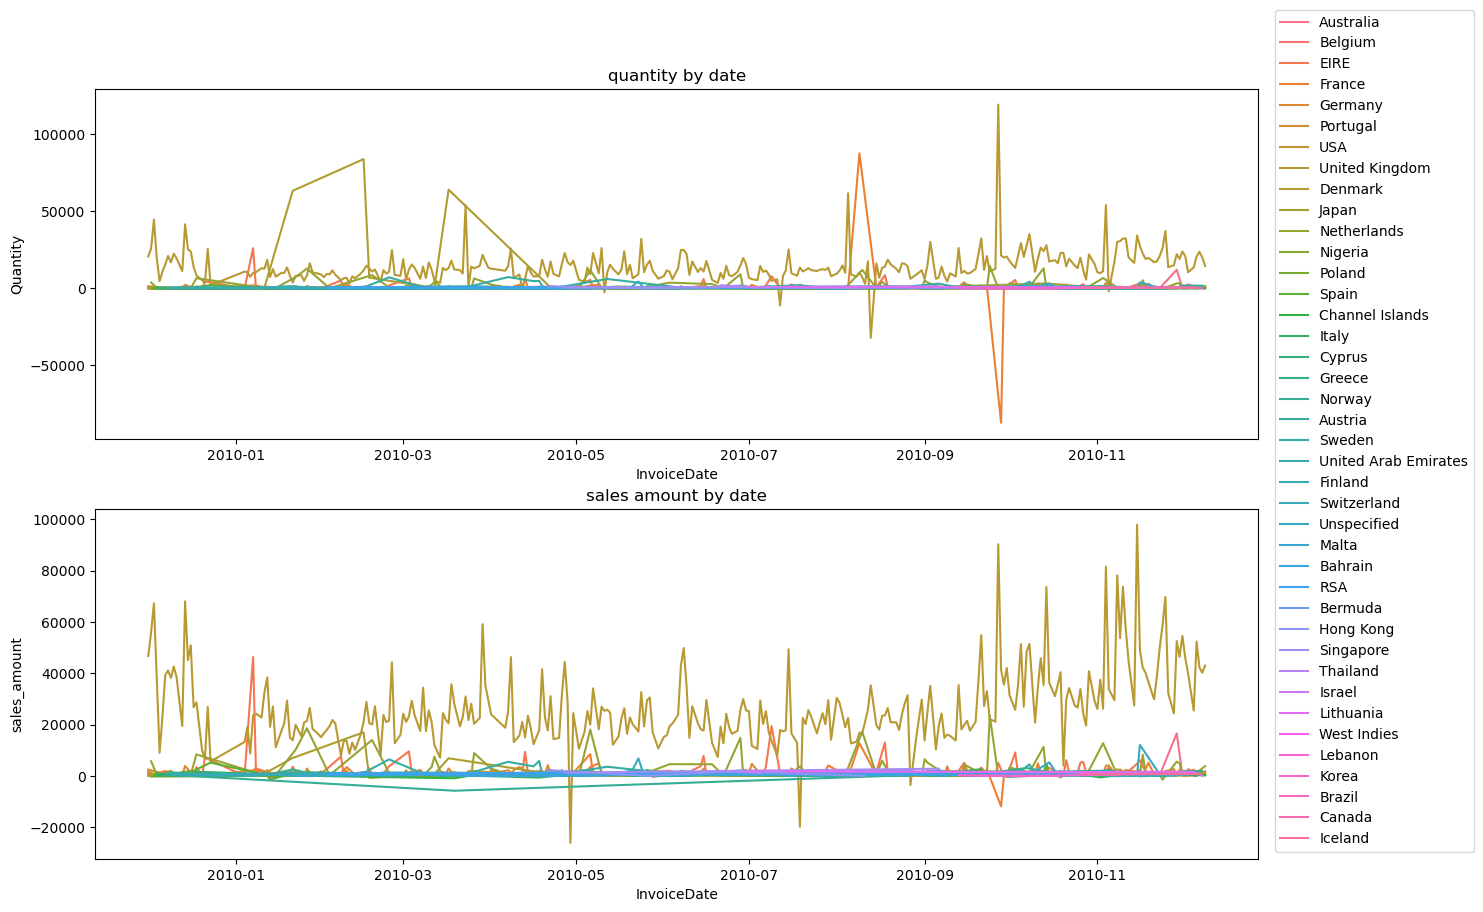

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=quantity_by_date, x='InvoiceDate', y='Quantity', hue='Country', ax=axes[0])
axes[0].set_title('quantity by date')
sns.lineplot(data=sales_amount_by_date, x='InvoiceDate', y='sales_amount', hue='Country', ax=axes[1])
axes[1].set_title('sales amount by date')

axes[0].legend().remove()
axes[1].legend(bbox_to_anchor=(1.1, 0), loc='lower center')

plt.show()

- sales_amount is increasing overall: not sure if this plays critical role 
- **It is certain that United Kingdom has been dominantly purchasing onine**

### Case Study: United Kingdom's online purchase

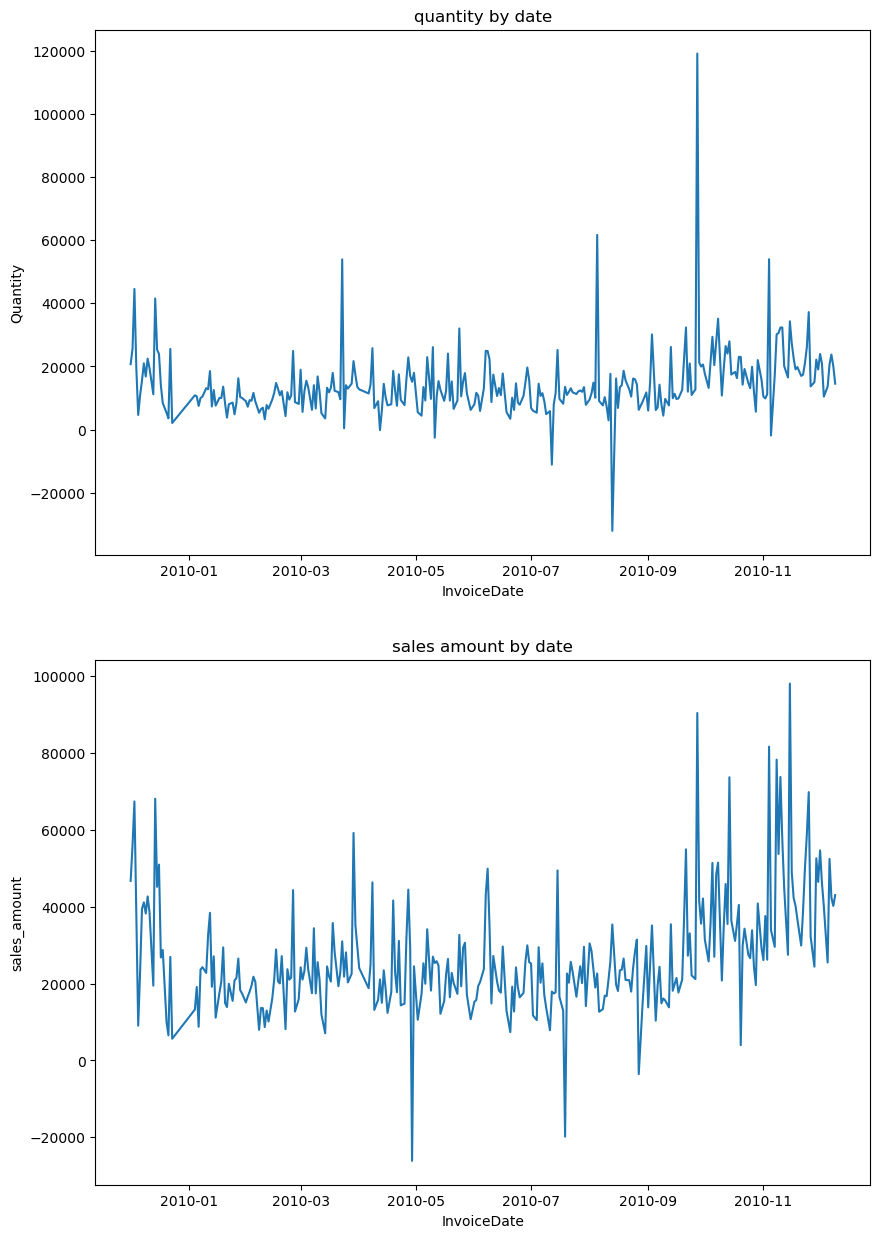

In [12]:
quantity_by_date_UK = quantity_by_date[quantity_by_date['Country']=='United Kingdom']
sales_amount_by_date_UK = sales_amount_by_date[sales_amount_by_date['Country']=='United Kingdom']


fig, axes = plt.subplots(2, 1, figsize=(10, 15))
# first plot
sns.lineplot(data=quantity_by_date_UK, x='InvoiceDate', y='Quantity', ax=axes[0])
axes[0].set_title('quantity by date')
# second plot
sns.lineplot(data=sales_amount_by_date_UK, x='InvoiceDate', y='sales_amount', ax=axes[1])
axes[1].set_title('sales amount by date')

plt.show()

- The severity of the variations in both quantity and sales amounts is high, but there are some repetitive patterns in the graph.
- therefore, the factors we can infer:
    - seasonal factor: the purchasing power might vary depending on the time of the year.(e.g. vacations, holidays)
    - economic factor: customers' intention to purchase might shrink during recession.
    - marketing activity: Company's repetitive events/promotions can raise the sales.

--------
* purchase trend comparison: ***anonymous customer v. registered customer***

In [13]:
retail_member = retail_sp[['InvoiceDate', 'Quantity', 'Price', 'Customer ID']]

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore') # ^0^ 
    retail_member['sales_amount'] = retail_member['Quantity'] * retail_member['Price']
    retail_member['InvoiceDate'] = retail_member['InvoiceDate'].dt.date
    retail_member['membership'] = retail_member['Customer ID'].apply(lambda x: 'membership' if x>= 0 else 'non-membership')

m_quantity_by_date = retail_member.groupby(['InvoiceDate', 'membership'])['Quantity'].sum().reset_index()
m_sales_amount_by_date = retail_member.groupby(['InvoiceDate', 'membership'])['sales_amount'].sum().reset_index()

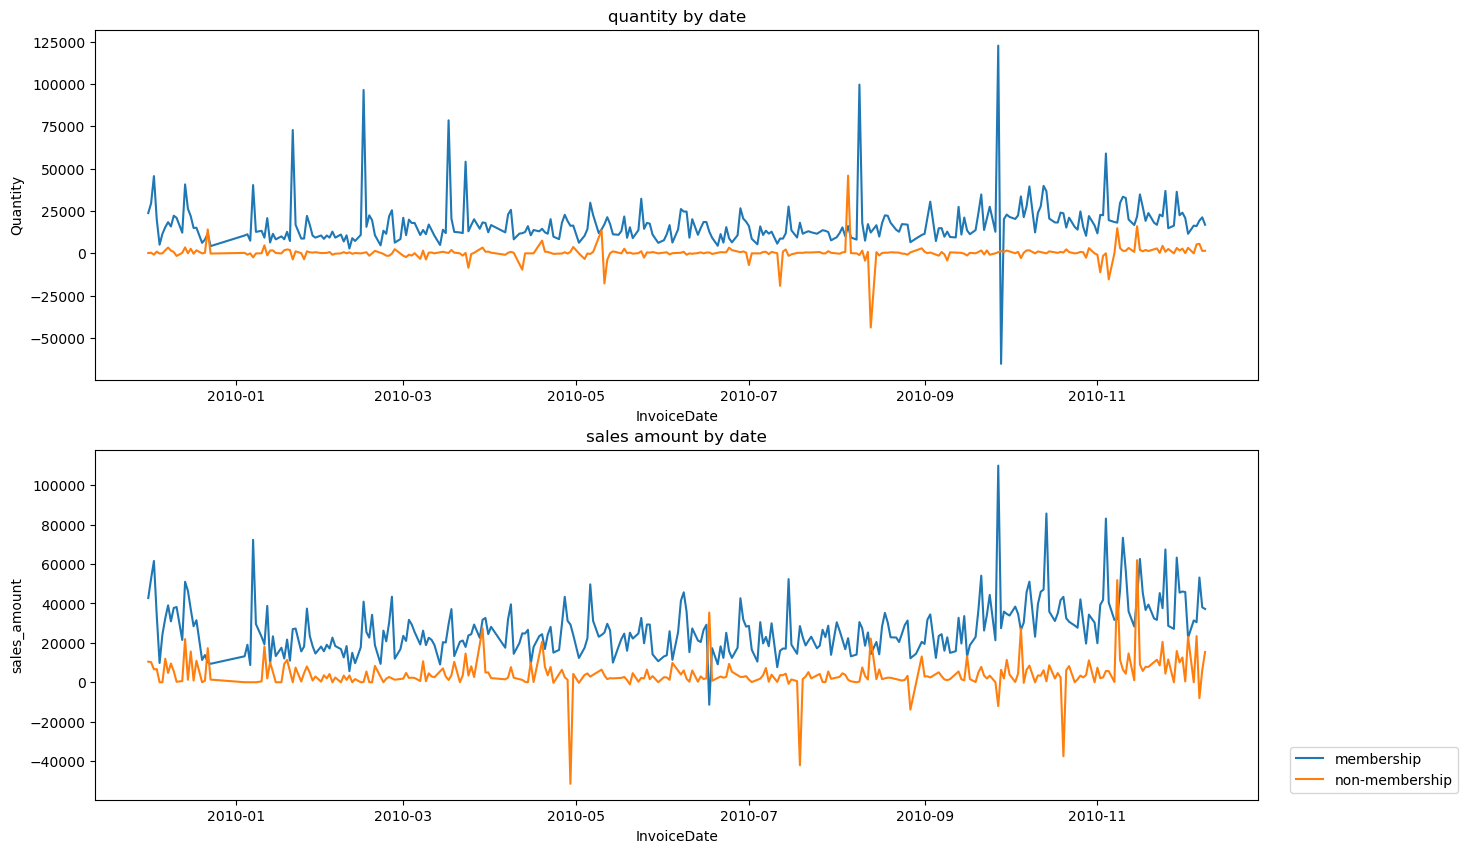

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=m_quantity_by_date, x='InvoiceDate', y='Quantity', hue='membership', ax=axes[0])
axes[0].set_title('quantity by date')
sns.lineplot(data=m_sales_amount_by_date, x='InvoiceDate', y='sales_amount', hue='membership', ax=axes[1])
axes[1].set_title('sales amount by date')

axes[0].legend().remove()
axes[1].legend(bbox_to_anchor=(1.1, 0), loc='lower center')

plt.show()

In [16]:
retail_member['membership'].value_counts()

membership
membership        417534
non-membership    107927
Name: count, dtype: int64

* considering the fact that we have enough amount of data for each party, registered customers'purchase >>>> that of anonymous customers 

### 1.2 data preprocessing

* objective: To cluster customers who have been actively purchasing in the United Kingdom and identify the main products ordered by each customer segment 
* extract only member customers whose purchase country is the United Kingdom, excluding cancellations and returns.

In [17]:
# purchase from the United Kingdom
retail_sp = retail_sp[retail_sp['Country']=='United Kingdom']

# only registered customers
retail_sp = retail_sp[retail_sp['Customer ID']>0]

# exclude returns and cancels
retail_sp = retail_sp[retail_sp['Price']>0]
retail_sp = retail_sp[retail_sp['Quantity']>0]

retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


### 1.3 create RFM feature 
- R recency: the customers recent purchase date ~ present
- F frequency: the customers purchasing frequency 
- M momnetary: the customers order $ amount in total
- others features can be appended for more effective customer analysis (e.g. coupon usage, puchasing item spectrum, etc.)

##### create M feature
monetary = sales amount = quantity * price

In [18]:
retail_sp['sales_amount'] = retail_sp['Quantity'] * retail_sp['Price']

##### create RFM index

In [19]:
rfm = {
    'InvoiceDate': 'max',
    'Invoice': 'count',
    'sales_amount': 'sum'
}

cust_df = retail_sp.groupby('Customer ID').agg(rfm)
cust_df

,InvoiceDate,Invoice,sales_amount
Customer ID,,,
12346,2010-06-28 13:53:00,33,372.86
12608,2010-10-31 10:49:00,16,415.79
12745,2010-08-10 10:14:00,22,723.85
12746,2010-06-17 10:41:00,17,254.55
12747,2010-12-05 15:38:00,154,5080.53
...,...,...,...
18283,2010-11-22 15:30:00,230,641.77
18284,2010-10-04 11:33:00,28,461.68
18285,2010-02-17 10:24:00,12,427.00


##### create R feature
recency = invoicedate - present 

In [21]:
max(retail_sp['InvoiceDate']) # take this into account when deciding the present date

Timestamp('2010-12-09 20:01:00')

set the present date as 1/1/2011

In [22]:
cust_df['Recency'] = cust_df['InvoiceDate'] - dt.datetime(2011, 1, 1)

# time spent -> day + 1
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)

cust_rfm = cust_df[['Invoice', 'sales_amount', 'Recency']]
cust_rfm.rename(columns={'Invoice': 'Frequency', 'sales_amount': 'Monetary'}, inplace=True)

cust_rfm

C:\Users\a\AppData\Local\Temp\ipykernel_17124\486605910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_rfm.rename(columns={'Invoice': 'Frequency', 'sales_amount': 'Monetary'}, inplace=True)


,Frequency,Monetary,Recency
Customer ID,,,
12346,33,372.86,-186
12608,16,415.79,-61
12745,22,723.85,-143
12746,17,254.55,-197
12747,154,5080.53,-26
...,...,...,...
18283,230,641.77,-39
18284,28,461.68,-88
18285,12,427.00,-317


### 1.4 Clustering utilizing the RFM feature 

##### RFM feature

In [24]:
cust_rfm.head()

,Frequency,Monetary,Recency
Customer ID,,,
12346,33,372.86,-186
12608,16,415.79,-61
12745,22,723.85,-143
12746,17,254.55,-197
12747,154,5080.53,-26


##### data scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

mns = MinMaxScaler()
scaled = mns.fit_transform(cust_rfm)
rfm_scaled = pd.DataFrame(data=scaled, columns=cust_rfm.columns)
rfm_scaled.head()

,Frequency,Monetary,Recency
0,0.006347,0.001059,0.560322
1,0.002975,0.001182,0.895442
2,0.004165,0.002065,0.675603
3,0.003173,0.000721,0.530831
4,0.030345,0.014542,0.989276


##### K-means clustering modeling

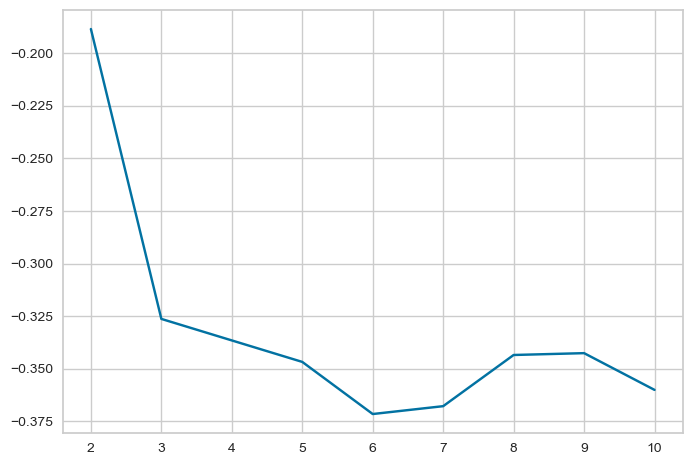

In [33]:
sil_coef = []

from sklearn.metrics import silhouette_score
for i in range(2, 11):
    kmeans_sil = KMeans(n_clusters=i, random_state=111)
    kmeans_sil.fit(rfm_scaled)
    score = silhouette_score(cust_rfm, kmeans_sil.labels_)
    sil_coef.append(score)

plt.plot(range(2, 11), sil_coef)
plt.xticks(range(2, 11))
plt.show()

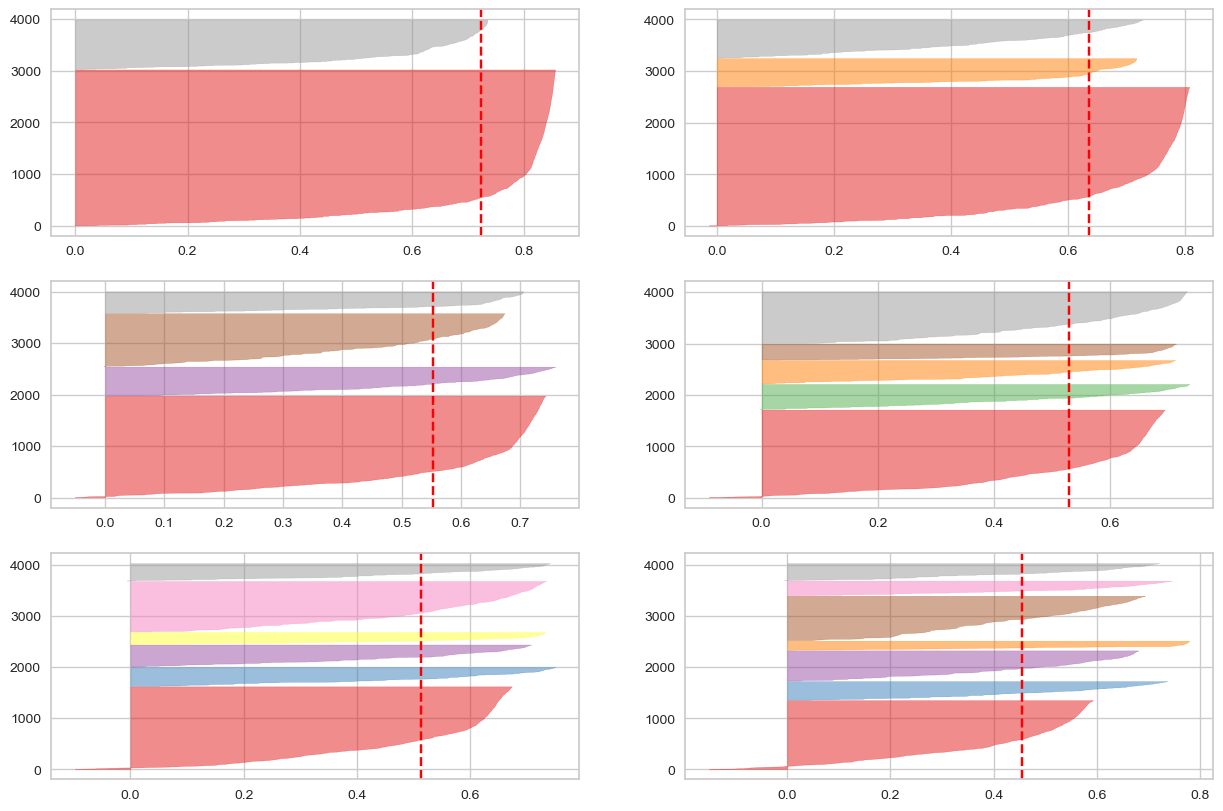

In [34]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2, 8):
    kmeans_sil = KMeans(n_clusters=i, random_state=111)
    q, mod = divmod(i, 2)
    visual = SilhouetteVisualizer(kmeans_sil, ax=ax[q-1][mod])
    visual.fit(rfm_scaled)

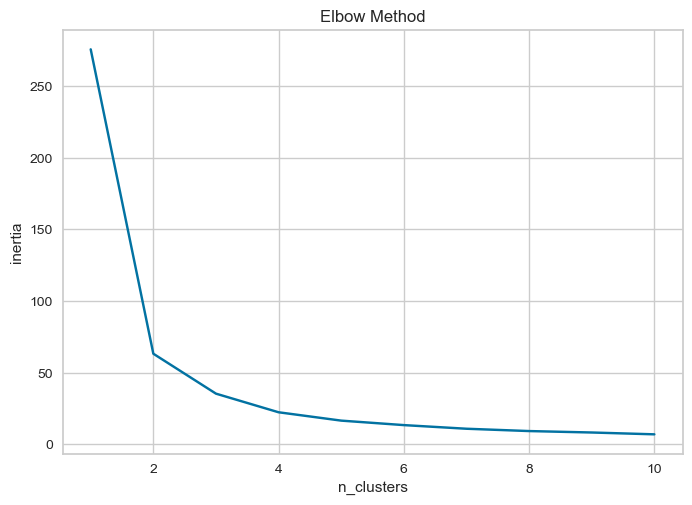

In [35]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 0)
    kmeans.fit(rfm_scaled)
    inertia_list.append(kmeans.inertia_) # The sum of the squares of the distances from each point to the centroid of the cluster.

plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show() 

The most appropriate value for \( k \) appears to be 3. The silhouette score plot (first image) shows a significant drop after \( k = 3 \), indicating that clusters are well-separated and compact at this point. The silhouette visualization (second image) supports this as the clusters appear somewhat distinct and well-formed for \( k = 3 \). Lastly, the elbow method plot (third image) demonstrates a clear "elbow" at \( k = 3 \), suggesting that the additional clusters beyond this point do not significantly reduce the sum of squared distances within clusters. Thus, \( k = 3 \) balances compactness and separation optimally.


In [45]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=111)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=111)

### 1.5 merge the prediction to the existing dataframe 

In [46]:
cust_rfm['cluster_kn'] = kmeans.fit_predict(cust_rfm)
cust_rfm

,Frequency,Monetary,Recency,cluster_kn
Customer ID,,,,
12346,33,372.86,-186,2
12608,16,415.79,-61,2
12745,22,723.85,-143,2
12746,17,254.55,-197,2
12747,154,5080.53,-26,2
...,...,...,...,...
18283,230,641.77,-39,2
18284,28,461.68,-88,2
18285,12,427.00,-317,2


In [47]:
import numpy as np
retail_sp['cluster_kn'] = np.nan

for ID, cluster in zip(cust_rfm.index, cust_rfm['cluster_kn']):
    retail_sp.loc[retail_sp['Customer ID']==ID, 'cluster_kn'] = cluster
    
retail_sp['cluster_kn'] = retail_sp['cluster_kn'].astype(int)
retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales_amount,cluster_kn
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90,2
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,2
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,2
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50,2


In [48]:
retail_sp['cluster_kn'].value_counts()

cluster_kn
2    349177
0     21125
1       627
Name: count, dtype: int64

### 1.6 analysis for each cluster

In [49]:
cluster_agg = {'Customer ID': 'count',
               'Quantity': ['sum', 'mean', 'std'],
               'Price': ['mean', 'std'],
               'sales_amount': ['mean', 'std'],
               'InvoiceDate': 'max'
               }

cluster_stats = retail_sp.groupby('cluster_kn').agg(cluster_agg)

cluster_stats.columns = ['count', 'quantity_sum', 'quantity_mean', 'quantity_std', 'price_mean', 'price_std', 'sales_amount_mean', 'sales_amount_std', 'date_max']

cluster_stats

,count,quantity_sum,quantity_mean,quantity_std,price_mean,price_std,sales_amount_mean,sales_amount_std,date_max
cluster_kn,,,,,,,,,
0,21125,904068,42.796118,215.114475,3.101343,61.877172,60.160725,203.790893,2010-12-09 17:27:00
1,627,124216,198.111643,173.177097,3.491930,4.728798,556.880941,580.590511,2010-12-09 13:44:00
2,349177,3420289,9.795287,42.970794,3.147450,27.566789,16.595298,45.419960,2010-12-09 20:01:00


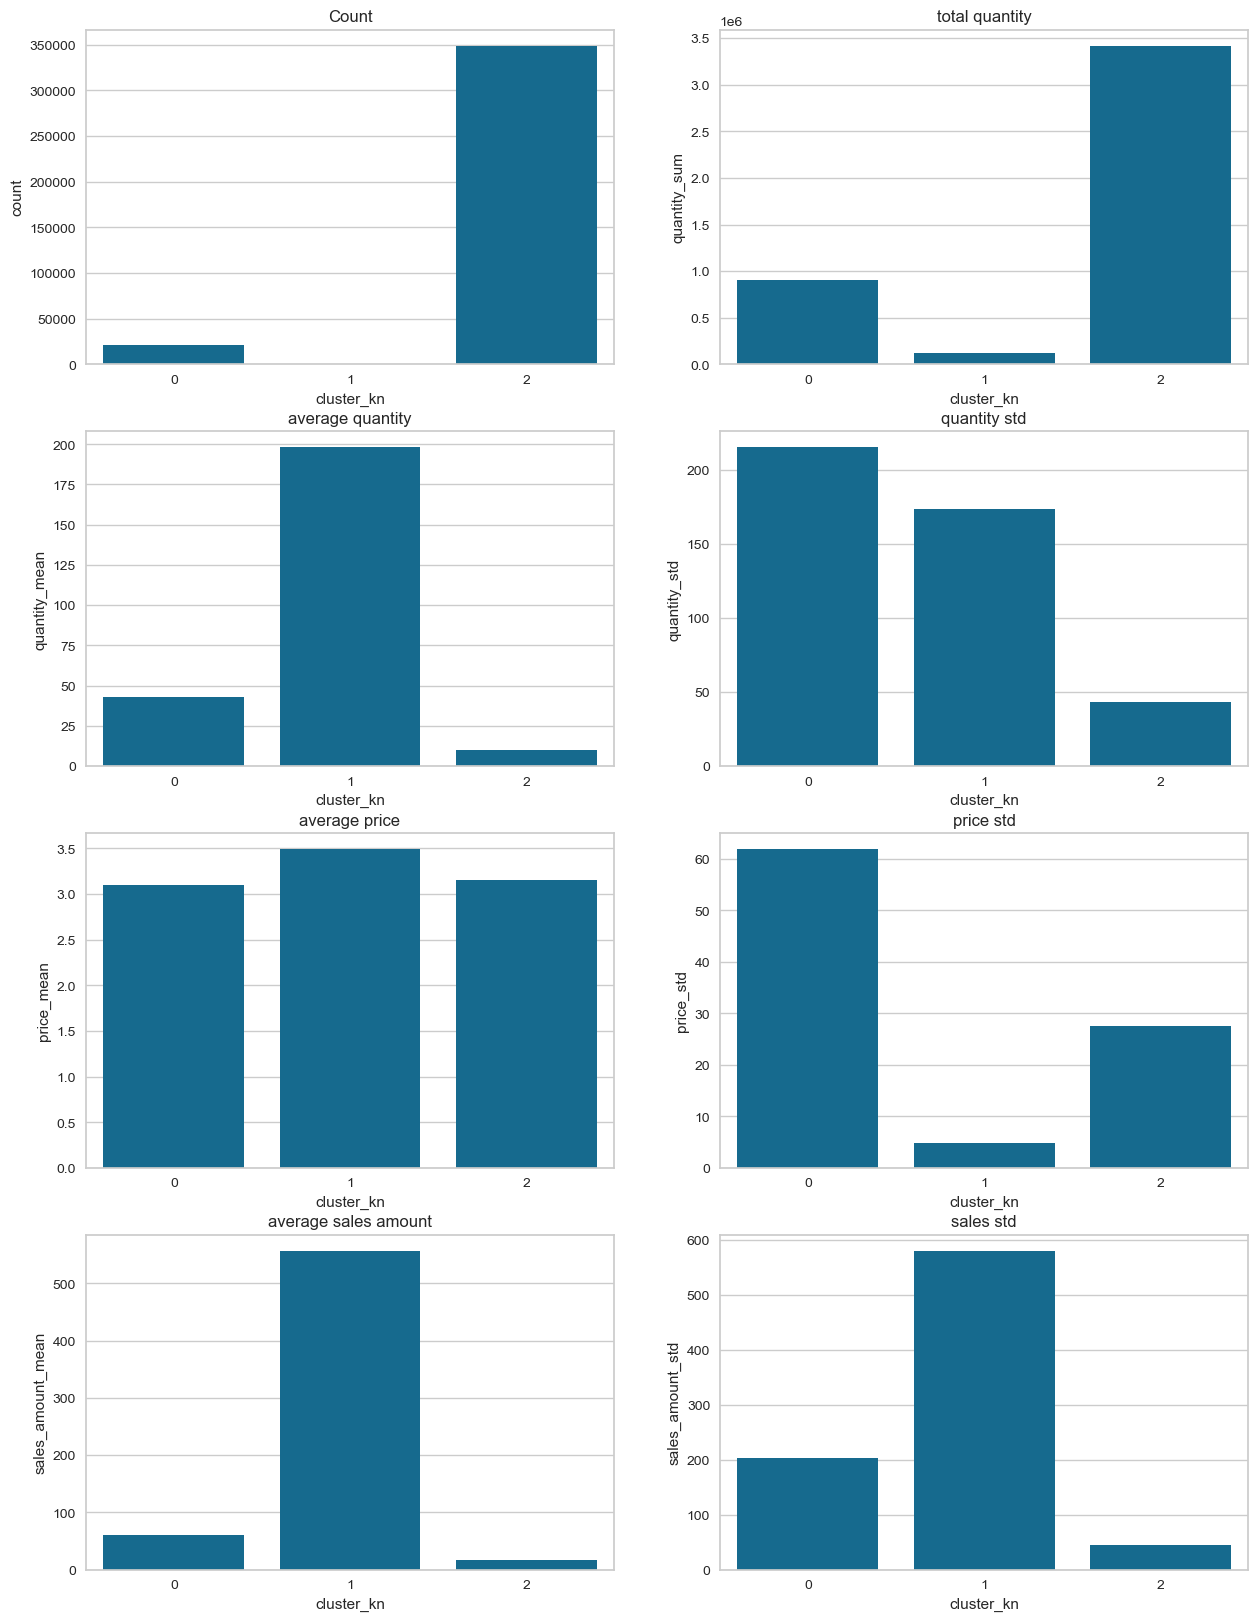

In [52]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
sns.barplot(x=cluster_stats.index, y='count', data=cluster_stats, ax=axes[0, 0])
axes[0, 0].set_title('Count')
sns.barplot(x=cluster_stats.index, y='quantity_sum', data=cluster_stats, ax=axes[0, 1])
axes[0, 1].set_title('total quantity')
sns.barplot(x=cluster_stats.index, y='quantity_mean', data=cluster_stats, ax=axes[1, 0])
axes[1, 0].set_title('average quantity')
sns.barplot(x=cluster_stats.index, y='quantity_std', data=cluster_stats, ax=axes[1, 1])
axes[1, 1].set_title('quantity std')
sns.barplot(x=cluster_stats.index, y='price_mean', data=cluster_stats, ax=axes[2, 0])
axes[2, 0].set_title('average price')
sns.barplot(x=cluster_stats.index, y='price_std', data=cluster_stats, ax=axes[2, 1])
axes[2, 1].set_title('price std')
sns.barplot(x=cluster_stats.index, y='sales_amount_mean', data=cluster_stats, ax=axes[3, 0])
axes[3, 0].set_title('average sales amount')
sns.barplot(x=cluster_stats.index, y='sales_amount_std', data=cluster_stats, ax=axes[3, 1])
axes[3, 1].set_title('sales std')

plt.subplots_adjust(hspace=0.2)

plt.show()

when we take the count and avg quantity tables into account,the customers in the group index 1 tend to utilize their membership very frequently.
the other statistics, however, hardly represent any crucial insights. Therefore, we need to check specific stats for rfm index as well.

purchase trend analysis per cluster (serial analysis)

In [53]:
retail_sp.loc[:, 'InvoiceDate'] = retail_sp['InvoiceDate'].dt.date

c_quantity_by_date = retail_sp.groupby(['InvoiceDate', 'cluster_kn'])['Quantity'].sum().reset_index()
c_sales_amount_by_date = retail_sp.groupby(['InvoiceDate', 'cluster_kn'])['sales_amount'].sum().reset_index()

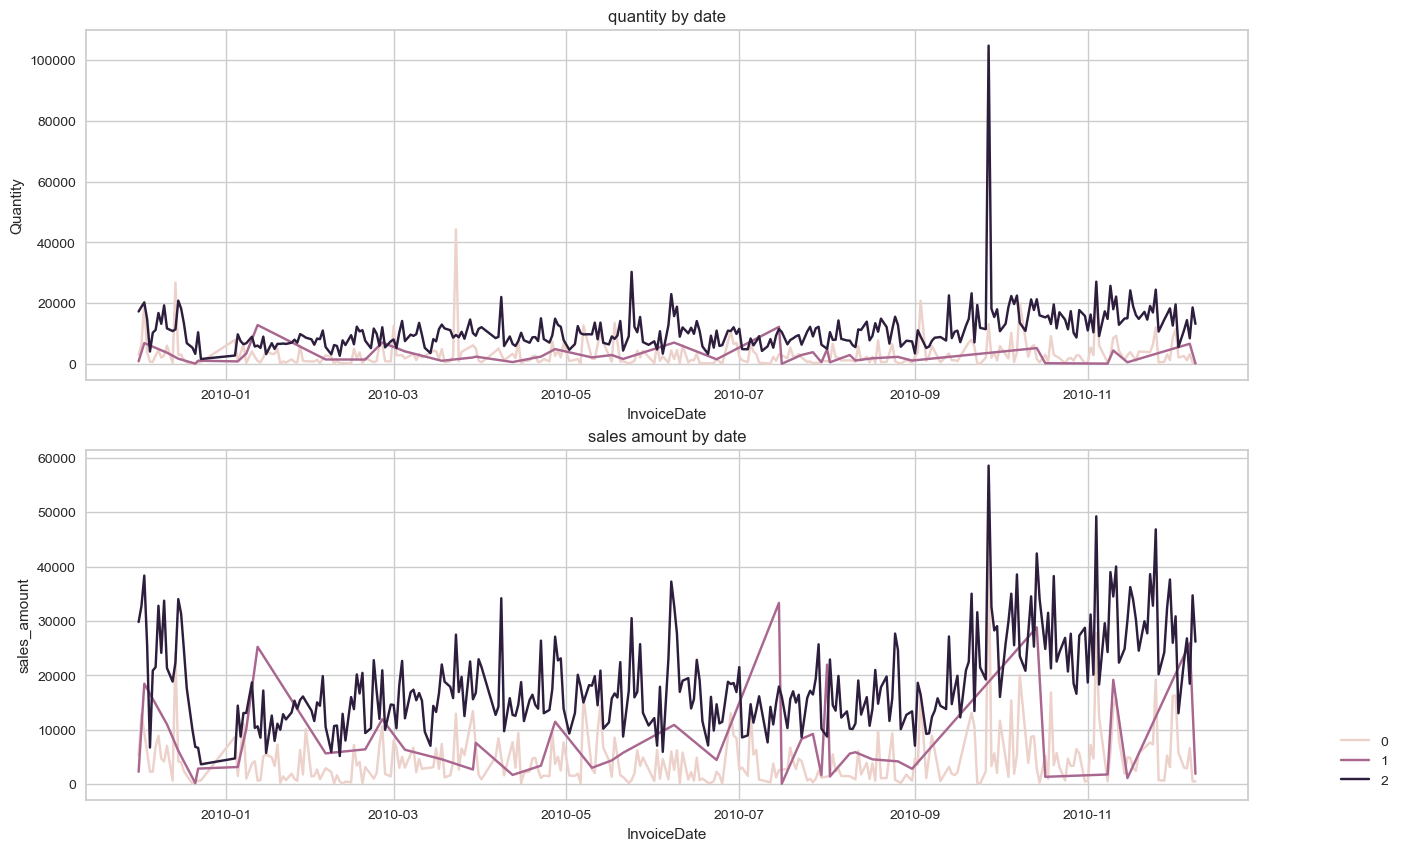

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=c_quantity_by_date, x='InvoiceDate', y='Quantity', hue='cluster_kn', ax=axes[0])
axes[0].set_title('quantity by date')
sns.lineplot(data=c_sales_amount_by_date, x='InvoiceDate', y='sales_amount', hue='cluster_kn', ax=axes[1])
axes[1].set_title('sales amount by date')

axes[0].legend().remove()
axes[1].legend(bbox_to_anchor=(1.1, 0), loc='lower center')

plt.show()

the most sold items per cluster

In [55]:
description = retail_sp.groupby('cluster_kn')['Description'].apply(
    lambda x: np.unique(x)[np.argmax(np.unique(x, return_counts=True)[1])]
)

pd.DataFrame(description)

,Description
cluster_kn,
0,WHITE HANGING HEART T-LIGHT HOLDER
1,BLACK HEART CARD HOLDER
2,WHITE HANGING HEART T-LIGHT HOLDER


* most cluster tended to buy white hanging heart t-light holder: Let's check the top 5 most sold items!

In [68]:
cluster_product_counts = retail_sp.groupby('cluster_kn')['Description'].value_counts()
top5_products_by_cluster = cluster_product_counts.groupby(level=0).nlargest(5)

pd.DataFrame(top5_products_by_cluster)

count
cluster_kn cluster_kn Description                              
0          0          WHITE HANGING HEART T-LIGHT HOLDER    202
                      WOODEN FRAME ANTIQUE WHITE            152
                      WOODEN PICTURE FRAME WHITE FINISH     145
                      WOOD S/3 CABINET ANT WHITE FINISH     129
                      WOOD 2 DRAWER CABINET WHITE FINISH    126
1          1          BLACK HEART CARD HOLDER                16
                      CREAM HEART CARD HOLDER                14
                      VINTAGE UNION JACK MEMOBOARD           11
                      WOOD BLACK BOARD ANT WHITE FINISH      10
                      HOME SWEET HOME MUG                     8
2          2          WHITE HANGING HEART T-LIGHT HOLDER   2846
                      REGENCY CAKESTAND 3 TIER             1449
                      STRAWBERRY CERAMIC TRINKET BOX       1247
                      ASSORTED COLOUR BIRD ORNAMENT        1217
                      REX CASH+CARRY JUMBO SHOPPER         1175

we can see each cluster has its only taste for the purchasing item, even though 2 of all clusters have shown their most interets in the white hanging heart t-light holder.

### 1.7 statistics for the RFM index 

In [69]:
cluster_agg = {'Frequency': ['count', 'mean', 'std'],
               'Monetary': ['mean', 'std'],
               'Recency': ['min', 'max', 'mean', 'std']
               }

rfm_stats = cust_rfm.groupby('cluster_kn').agg(cluster_agg)

rfm_stats

Frequency                               Monetary                \
               count       mean          std           mean           std   
cluster_kn                                                                  
0                 26  812.50000  1082.373845   48880.589269  24591.753999   
1                  1  627.00000          NaN  349164.350000           NaN   
2               3942   88.57864   151.303145    1469.988912   2380.911652   

           Recency                             
               min max        mean        std  
cluster_kn                                     
0             -102 -22  -31.884615  15.870292  
1              -22 -22  -22.000000        NaN  
2             -395 -22 -112.647641  97.166099

cluster index 1 is found to be the "outlier"

tbc...